In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"nurlisawidyaningsih","key":"2080f80eb5807b3224417c89ccb84871"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 225MB/s]


In [6]:
!unzip flight-price-prediction.zip -d flight_prices
!ls flight_prices

Archive:  flight-price-prediction.zip
  inflating: flight_prices/Clean_Dataset.csv  
  inflating: flight_prices/business.csv  
  inflating: flight_prices/economy.csv  
business.csv  Clean_Dataset.csv  economy.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("flight_prices/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df=df.drop(["Unnamed: 0"],axis=1)

In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [13]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
df["days_left"].value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [15]:
df["duration"].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

In [16]:
categorical_cols = ['airline','source_city','departure_time', 'arrival_time', 'destination_city','class']

In [17]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

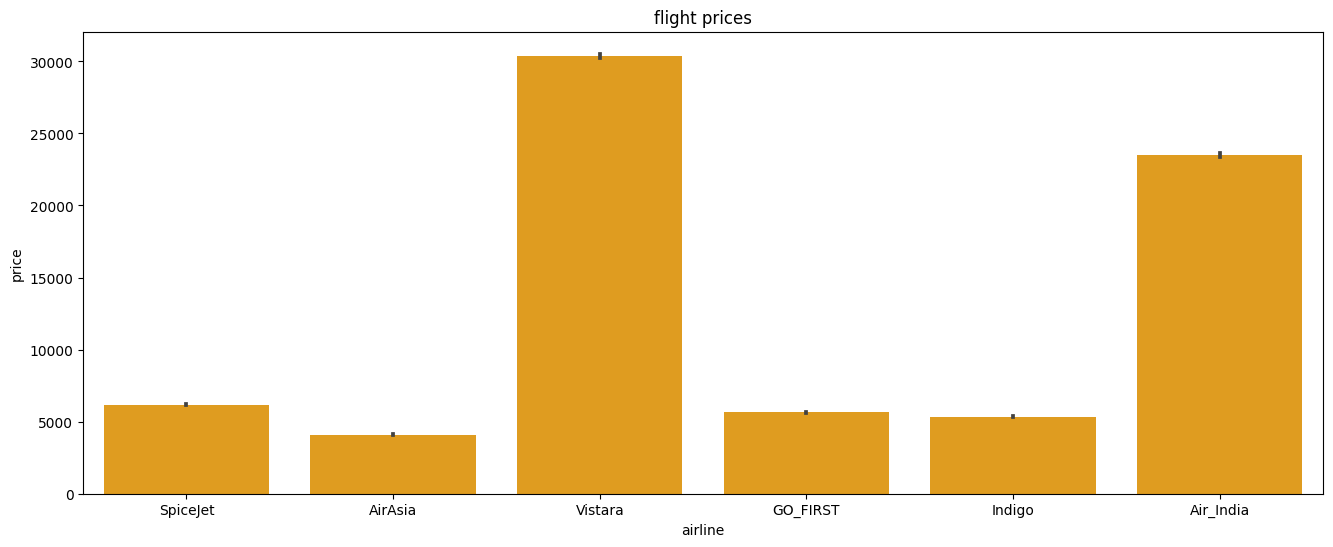

In [18]:
plt.figure(figsize=(16,6))
plt.title("flight prices")
sns.barplot(x="airline", y="price",color="Orange",data=df);
plt.show()

<Axes: >

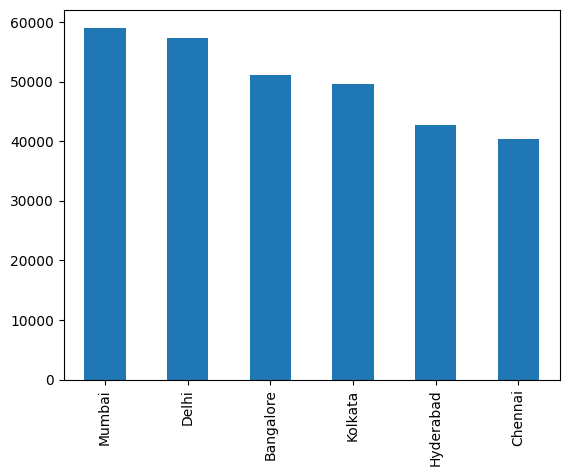

In [19]:
df.destination_city.value_counts().plot.bar()

<Axes: xlabel='destination_city'>

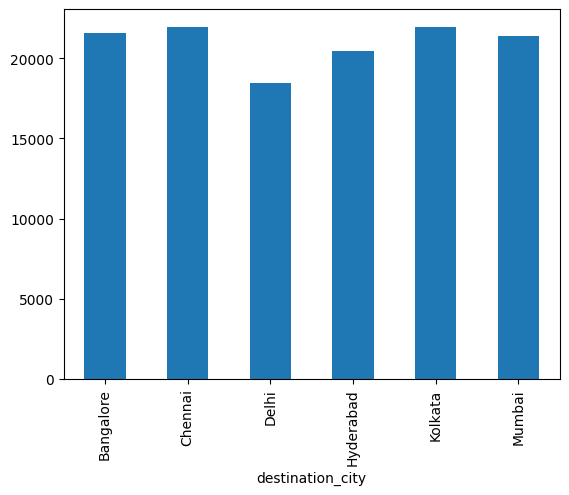

In [20]:
df.groupby("destination_city")['price'].mean().plot.bar()

<Axes: xlabel='source_city'>

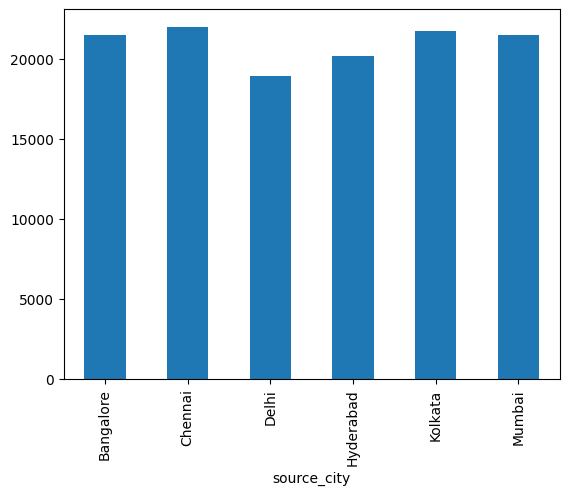

In [21]:
df.groupby("source_city")['price'].mean().plot.bar()

<Axes: xlabel='airline'>

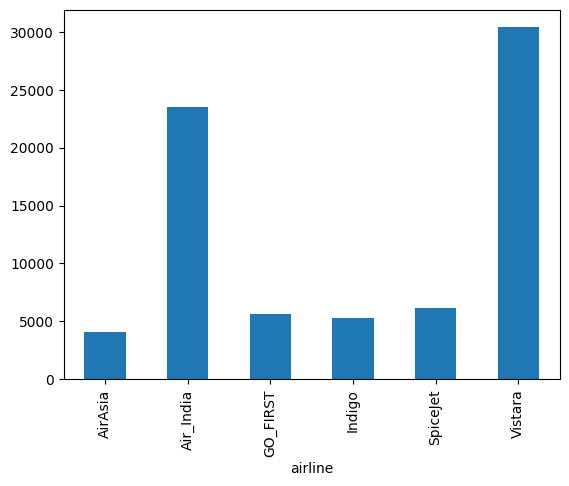

In [22]:
df.groupby("airline")['price'].mean().plot.bar()

<Axes: xlabel='stops'>

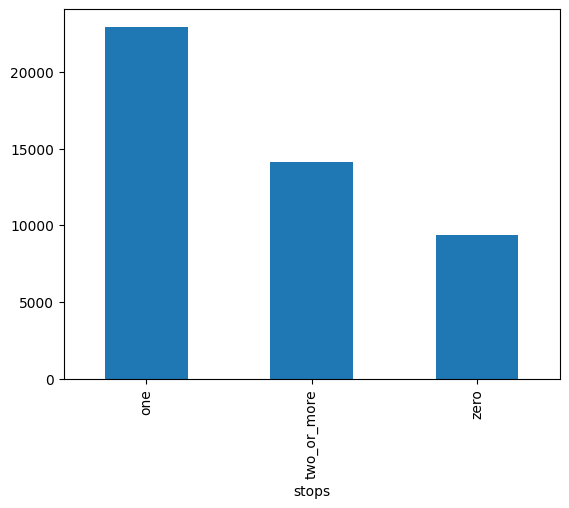

In [23]:
df.groupby("stops")['price'].mean().plot.bar()

<Axes: xlabel='days_left'>

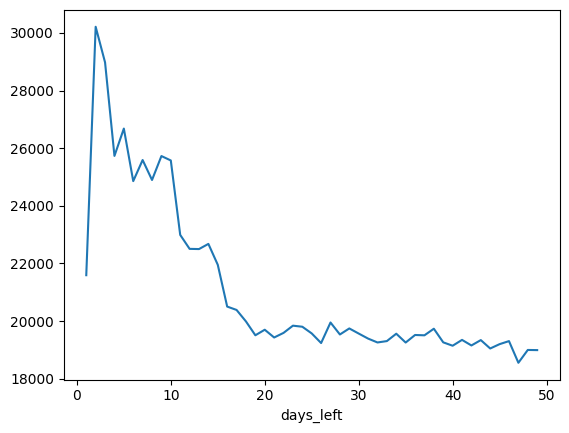

In [24]:
df.groupby("days_left")['price'].mean().plot()

<Axes: xlabel='departure_time'>

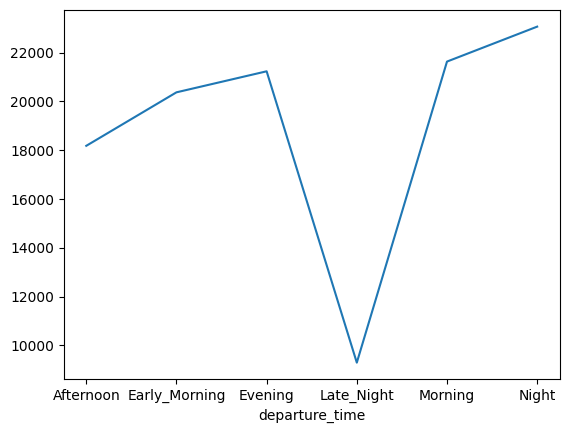

In [25]:
df.groupby("departure_time")['price'].mean().plot()

<Axes: xlabel='arrival_time'>

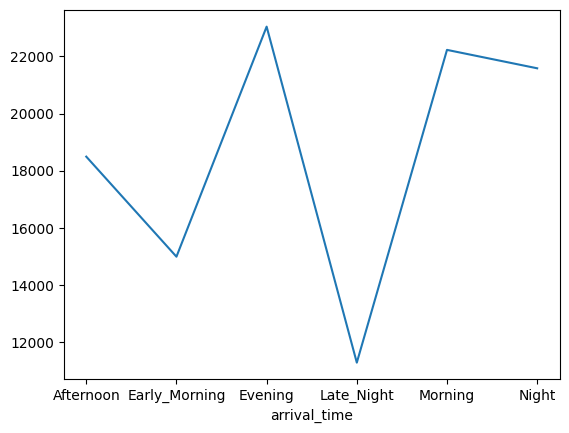

In [26]:
df.groupby("arrival_time")['price'].mean().plot()

<ipython-input-27-c29a8587184a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


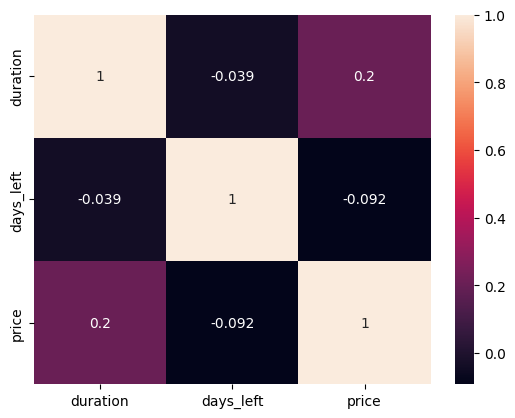

In [27]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [28]:
df[['airline_code', 'flight_number']] = df['flight'].str.split('-', n=1, expand=True)
df.drop("flight", axis = 1, inplace = True)
df.drop("airline_code", axis = 1, inplace = True)

In [29]:
df['flight_number'] = df['flight_number'].astype('int')

In [30]:
df.flight_number.value_counts()

808     3313
706     3235
772     2860
774     2808
720     2650
        ... 
8480       1
405        1
3211       1
9974       1
1058       1
Name: flight_number, Length: 1254, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder

In [33]:
le = LabelEncoder()

In [34]:
df['stops'] = df['stops'].replace({'one': 1,
                                   'zero': 0,
                                   'two_or_more': 2})

In [35]:
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

In [37]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,4,2,2,0,5,5,1,2.17,1,5953,8709
1,4,2,1,0,4,5,1,2.33,1,5953,8157
2,0,2,1,0,1,5,1,2.17,1,5956,764
3,5,2,4,0,0,5,1,2.25,1,5955,995
4,5,2,4,0,4,5,1,2.33,1,5955,963


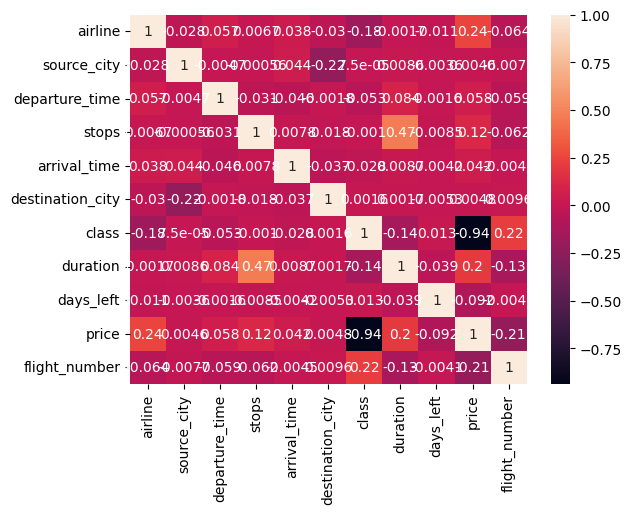

In [38]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [39]:
x = df.drop('price', axis = 1)
y = df['price']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [44]:
model = LinearRegression()

In [45]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [46]:
score = model.score(x_test, y_test)
print(f"this has {score} of score")

this has 0.9065037519627925 of score


In [48]:
data = np.array([[4, 2, 2, 0, 5, 5, 1, 2.17, 1, 8709]])
prediction = model.predict(data)
print('Estimasi harga tiket pesawat dalam rupees : ', prediction)

Estimasi harga tiket pesawat dalam rupees :  [5299.03114632]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Matrix Evaluation using r2

In [49]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
kf = KFold(shuffle=True, random_state=42, n_splits=5)

In [51]:
s = StandardScaler()
lr = LinearRegression()

In [52]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [53]:
predictions = cross_val_predict(estimator, x, y, cv=kf)

In [54]:
r2_score(y, predictions)

0.9063636882936632

Exporting Model

In [56]:
import pickle

filename = "estimasi_harga_tiket.sav"
pickle.dump(model,open(filename,'wb'))